# Daily Climate time series

For the last project I took the Dataset fully dedicated for the developers who want to train the model on Weather Forecasting for Indian climate. This dataset provides data from 1st January 2013 to 24th April 2017 in the city of Delhi, India.

In [44]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from datetime import datetime
from datetime import timedelta

import statsmodels as ss

from dateutil.relativedelta import relativedelta
from IPython.display import display

from colorsetup import colors, palette

## Exploratory data

Start by looking to the file content

In [45]:
# read the data from the file
filepath = 'DailyDelhiClimate.csv'
data = pd.read_csv(filepath, sep=',')

data.head(10)

,date,meantemp,humidity,wind_speed,meanpressure
0,01/01/2013,10.000000,84.500000,0.000000,1015.666667
1,02/01/2013,7.400000,92.000000,2.980000,1017.800000
2,03/01/2013,7.166667,87.000000,4.633333,1018.666667
3,04/01/2013,8.666667,71.333333,1.233333,1017.166667
4,05/01/2013,6.000000,86.833333,3.700000,1016.500000
5,06/01/2013,7.000000,82.800000,1.480000,1018.000000
6,07/01/2013,7.000000,78.600000,6.300000,1020.000000
7,08/01/2013,8.857143,63.714286,7.142857,1018.714286
8,09/01/2013,14.000000,51.250000,12.500000,1017.000000
9,10/01/2013,11.000000,62.000000,7.400000,1015.666667


In [46]:
data.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

### Visual representation

start making the various plots

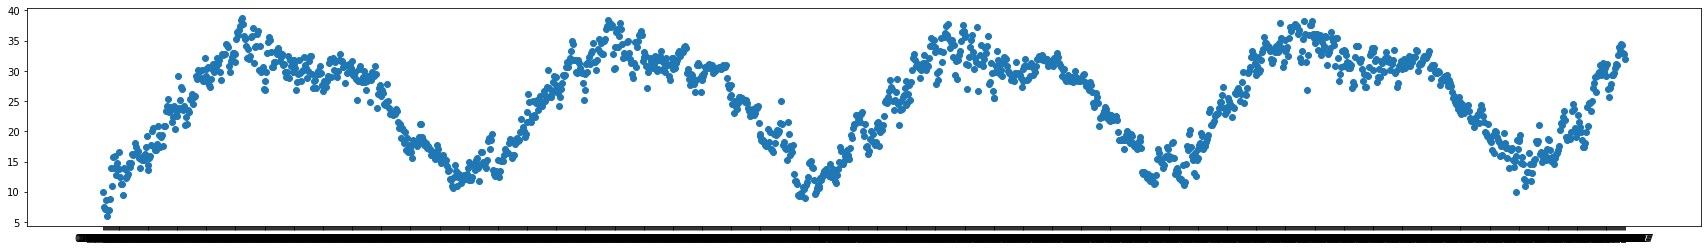

In [47]:
plt.figure(figsize=(30, 4))
plt.plot(data.date, data.meantemp, ls='', marker='o')

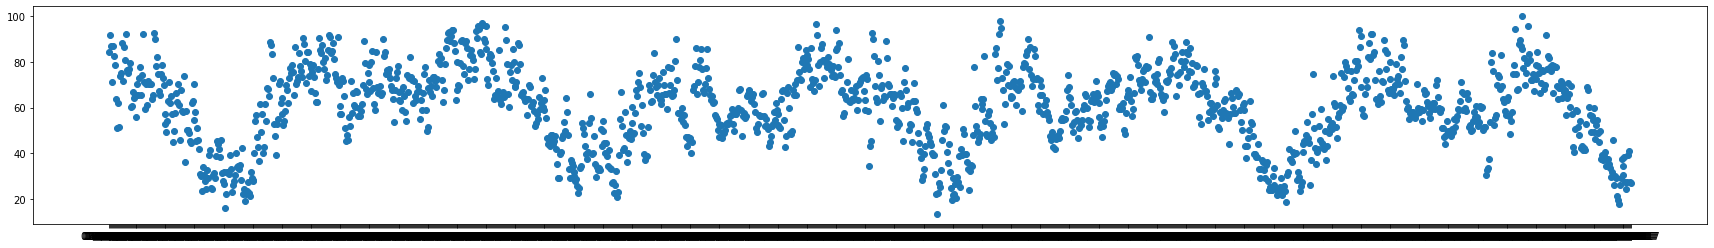

In [48]:
plt.figure(figsize=(30, 4))
plt.plot(data.date, data.humidity, ls='', marker='o')

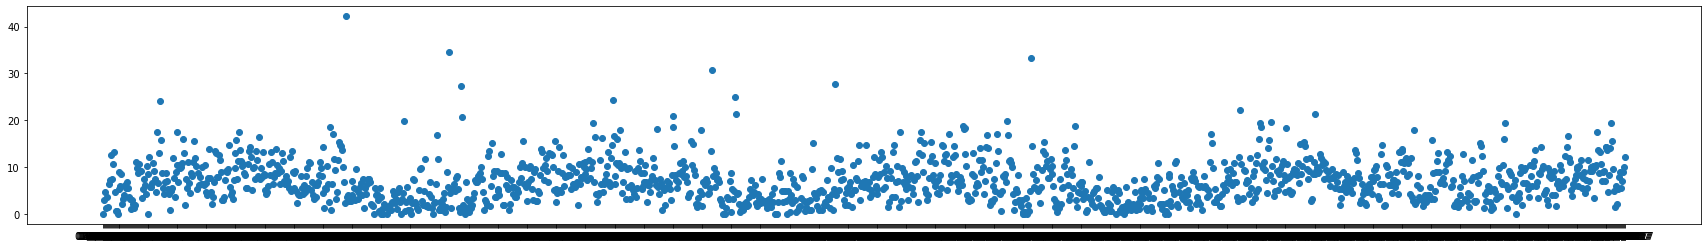

In [49]:
plt.figure(figsize=(30, 4))
plt.plot(data.date, data.wind_speed, ls='', marker='o')

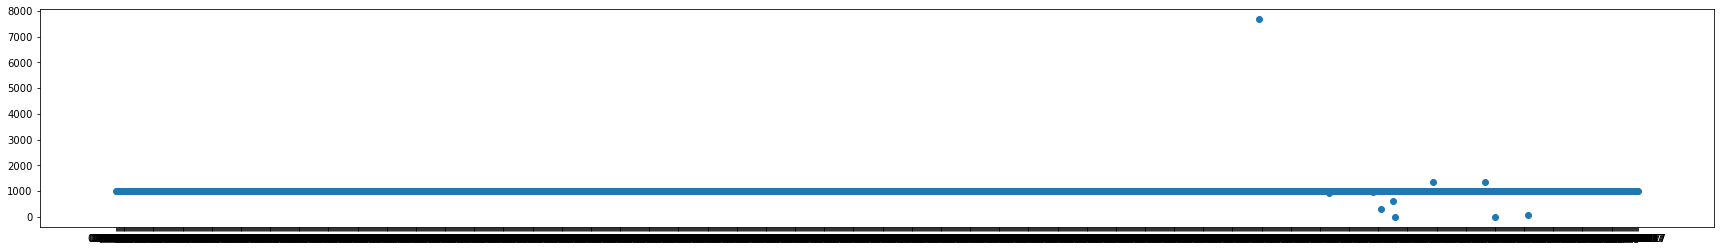

In [50]:
plt.figure(figsize=(30, 4))
plt.plot(data.date, data.meanpressure, ls='', marker='o')

<AxesSubplot:>

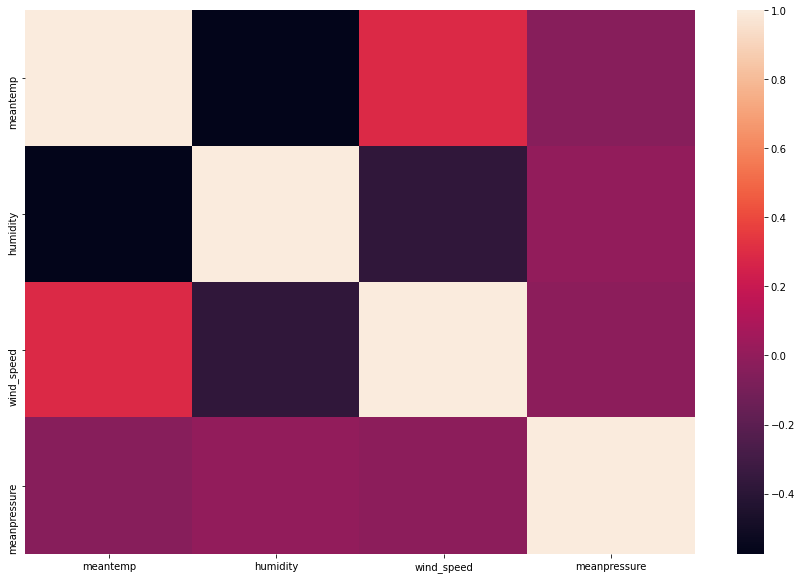

In [51]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(data.corr())

## Data cleaning and feature engineering

Even though the dataset seems already clean as it is, I still want to check if some cleaning is to be done and then check if I need to make some works for feature engineering. For data cleaning I start by checking if there are some `min` and `max` that are too out of scale.

data.min()

In [52]:
data.max()

date             31/12/2016
meantemp          38.714286
humidity              100.0
wind_speed            42.22
meanpressure    7679.333333
dtype: object

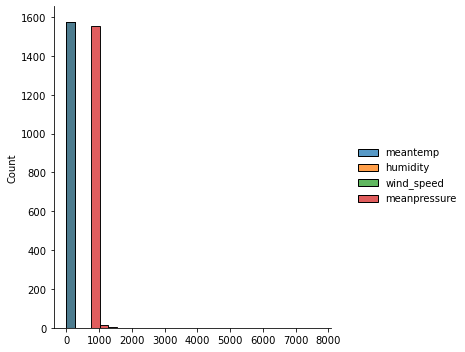

In [53]:
sns.displot(data, bins=30)

## Time series work

I can now work on the actual data for time series engineering. First of all I'll change the date to make it numpy like, and then start making analysis on the data for time series.

In [54]:
data['date'] = data.date.astype('datetime64[ns]')

In [94]:
data.set_index('date', inplace=True)

### Indexing

To uniquely identify observations, we can either add categorical variables to the Index, or set a Pandas DateTimeIndex with separate columns for each series, by pivoting.

In [96]:
new_index = data.index
print(new_index)

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01',
               ...
               '2017-04-15', '2017-04-16', '2017-04-17', '2017-04-18',
               '2017-04-19', '2017-04-20', '2017-04-21', '2017-04-22',
               '2017-04-23', '2017-04-24'],
              dtype='datetime64[ns]', name='date', length=1576, freq=None)


In [98]:
date_new = data.reindex(index=data.index, columns=data.columns)

date_new

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-02-01,7.400000,92.000000,2.980000,1017.800000
2013-03-01,7.166667,87.000000,4.633333,1018.666667
2013-04-01,8.666667,71.333333,1.233333,1017.166667
2013-05-01,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [91]:
data.shape

(1576, 5)

Set the various range of data we will use to plot; I will make a weekly, monthly, quarterly, and annual range of data, even though I won't be using the annual one, as I'm more interested in the smaller range.

In [99]:
temp_weekly = date_new.resample('W').sum()
print('Weekly data')
print(temp_weekly.head(), '\n')

temp_monthly = date_new.resample('M').sum()
print('Monthly data')
print(temp_monthly.head(), '\n')

temp_quarterly = date_new.resample('Q').sum()
print('Quarterly data')
print(temp_quarterly.head(), '\n')

temp_annual = date_new.resample('Y').sum()
print('Annual data')
print(temp_annual.head(), '\n')

Weekly data
              meantemp    humidity  wind_speed  meanpressure
date                                                        
2013-01-06  132.565476  322.190476   56.809881   6058.083333
2013-01-13  179.404762  470.723810   39.406190   7048.104761
2013-01-20   95.500000  571.642857   29.700000   7119.976191
2013-01-27   86.307143  474.238095   33.393810   7142.359524
2013-02-03  102.558333  481.100000   30.988214   7121.908333 

Monthly data
              meantemp     humidity  wind_speed  meanpressure
date                                                         
2013-01-31  553.650000  2096.323810  170.264524  31439.239285
2013-02-28  574.530952  1885.254762  233.406786  28347.132143
2013-03-31  746.992857  1785.296429  266.074524  31296.442858
2013-04-30  833.915476  1341.967857  216.476310  30192.420240
2013-05-31  959.652381  1282.446429  267.230714  31077.267858 

Quarterly data
               meantemp     humidity  wind_speed  meanpressure
date                            

Plot the various information

<AxesSubplot:title={'center':'Weekly temp'}, xlabel='date'>

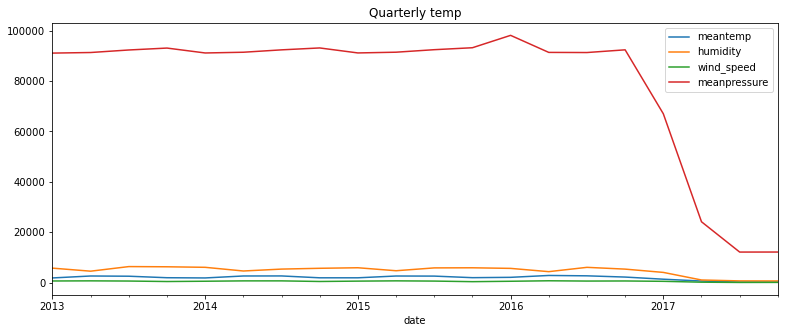

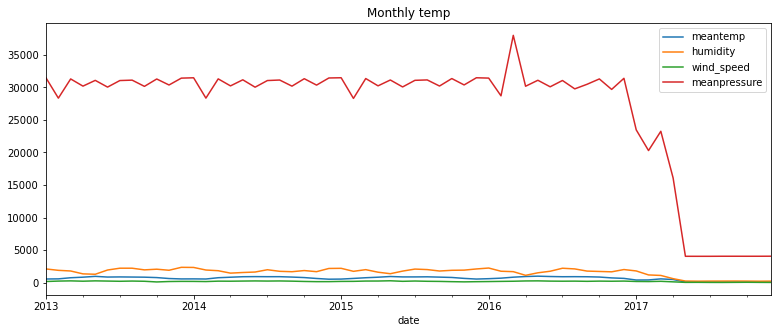

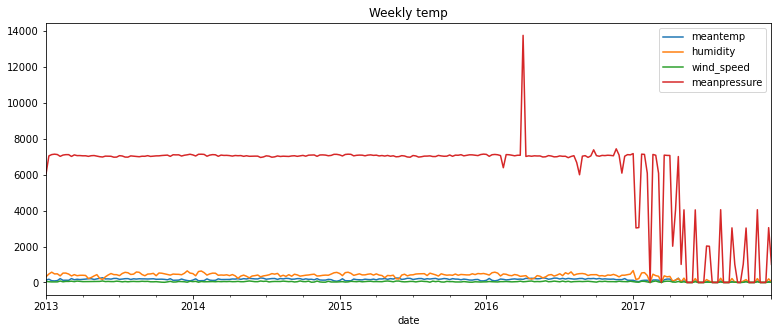

In [100]:
plotsize = (13, 5)

temp_quarterly.plot(figsize=plotsize, title='Quarterly temp')
temp_monthly.plot(figsize=plotsize, title='Monthly temp')
temp_weekly.plot(figsize=plotsize, title='Weekly temp')